## Final Project Submission

Please fill out:
* Student name: Justin Grisanti
* Student pace: self paced
* Scheduled project review date/time: 8/27/2021 at 5:30 pm
* Instructor name: Jeff Herman
* Blog post URL: https://justingrisanti.github.io/real-estate_pricing_predictors


# Section 1: Business Understanding

The purpose of this section is to understand what the business problem and the stakeholders that will be understanding the work that I am performing. The stakeholder of my project is a real-estate consulting start-up that tries to help clients increase the value of their home. 
The main purpose of this algorithm is predictive, meaning that the model should be able to take in attributes of houses, and to predict a price associated with it.

The secondary purpose of this algorithm is inferential, meaning that the model should reveal something about the relationship between the attributes of a housing attributes and its price. I will apply my knowledge of statistics to include appropriate dialogue about these relationships. This could help home-owners take the necessary steps to modify their home to maximize a potential return.


# Section 2: Data Understanding

Based on what I see below, I understand the following about the data. First, it comes from Kings County, Washington, based on what I can see from latitude and longitude. Second, it includes several items related to housing information, including beds and baths, lot size, and condition/grade. This data is useful because it has many attributes that can impact the target variable. In this case, I will be using price as my target variable and will use the other variables to predict price using regression.

In [1]:
# To import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.preprocessing as sk

In [2]:
# To import dataset

kc_house = pd.read_csv("data/kc_house_data.csv")

In [3]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# After working with the dataset below, I determined that it would be easier to clean the data before the train-test split.

kc_house['sqft_basement'] = kc_house['sqft_basement'].replace('?', 0)

In [5]:
# After working with the dataset below, I determined that it would be easier to clean the data before the train-test split.

kc_house['sqft_basement'] = kc_house['sqft_basement'].astype("float64")

In [6]:
# Switching sqft_basement data to binary field, either 0 for no basement or 1 for basement.

mask2 = kc_house.sqft_basement > 0
column_name = 'sqft_basement'
kc_house.loc[mask2, column_name] = 1

In [7]:
# Adding filter for prices below 1.2 M to make dataset more normal and remove outliers.

kc_house = kc_house[kc_house['price'] < 1200000]

In [8]:
# Adding filter for bedrooms below 20 to make dataset more normal and remove outliers.

kc_house = kc_house[kc_house['bedrooms'] < 20]

In [9]:
# Adding filter for bathrooms below 20 to make dataset more normal and remove outliers.

kc_house = kc_house[kc_house['bathrooms'] < 6]

In [10]:
# Adding filter for living square footage below 10k to make dataset more normal and remove outliers.

kc_house = kc_house[kc_house['sqft_living'] < 10000]

Before splitting my data into test/train, I ran a histogram of price to further understand the data. As normality is an assumption of linear regression, it seems that there are outliers here that could be handled. The following are outliers that I have filtered based on the data below.

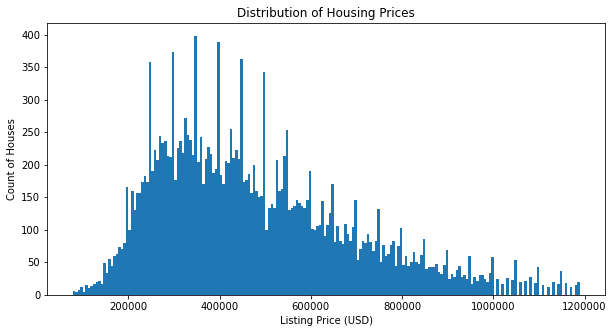

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(kc_house['price'], bins=200)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Housing Prices");

Looking at the data below, there seems to be many rows of data. At first glance, every column seems to be relevant to the determination of price. I will run a correlation matrix below to determine which columns actually appear to impact price.

In [12]:
# Split data into x and y axis

x_kc = kc_house.drop("price", axis=1)
y_kc = kc_house["price"]

In [13]:
# Split data into train and test splits

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_kc, y_kc, random_state=42)

print(f"x_train is a DataFrame with {x_train.shape[0]} rows and {x_train.shape[1]} columns")
print(f"y_train is a Series with {x_train.shape[0]} values")

x_train is a DataFrame with 15430 rows and 20 columns
y_train is a Series with 15430 values


In [14]:
# Make copies to avoid warnings

x_train = x_train.copy()
x_test = x_test.copy()

In [15]:
x_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20574 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20574 non-null  int64  
 1   date           20574 non-null  object 
 2   bedrooms       20574 non-null  int64  
 3   bathrooms      20574 non-null  float64
 4   sqft_living    20574 non-null  int64  
 5   sqft_lot       20574 non-null  int64  
 6   floors         20574 non-null  float64
 7   waterfront     18294 non-null  float64
 8   view           20515 non-null  float64
 9   condition      20574 non-null  int64  
 10  grade          20574 non-null  int64  
 11  sqft_above     20574 non-null  int64  
 12  sqft_basement  20574 non-null  float64
 13  yr_built       20574 non-null  int64  
 14  yr_renovated   16918 non-null  float64
 15  zipcode        20574 non-null  int64  
 16  lat            20574 non-null  float64
 17  long           20574 non-null  float64
 18  sqft_l

In [16]:
# Understand general statistics

x_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.543000e+04,15430.000000,15430.000000,15430.000000,1.543000e+04,15430.000000,13732.000000,15385.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,12699.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000
mean,4.609972e+09,3.327220,2.053597,1982.856643,1.474178e+04,1.475826,0.003204,0.179786,3.408231,7.539598,1713.569086,0.372132,1970.855541,74.624301,98078.165716,47.557477,-122.213023,1926.491380,12496.030201
std,2.877897e+09,0.886262,0.705813,782.582706,4.043735e+04,0.534837,0.056517,0.656417,0.647042,1.043027,731.463139,0.483389,29.169789,378.593040,53.123602,0.140896,0.142422,617.226912,26935.220359
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.131826e+09,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.462900,-122.331000,1470.000000,5058.250000
50%,3.918400e+09,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.567700,-122.231000,1810.000000,7560.000000
75%,7.343900e+09,4.000000,2.500000,2440.000000,1.041550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2110.000000,1.000000,1996.000000,0.000000,98118.000000,47.679800,-122.122000,2280.000000,9940.000000
max,9.900000e+09,10.000000,5.250000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7320.000000,1.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


# Section 3: Data Preparation

Next step is to prepare/clean the data to ensure that nothing is causing any blockers for my model. I will take a look at the value counts to see if there are any errors at first glance.

In [17]:
# Running a general for-loop to inspect each category of data for any odd entries or outliers.

for col in x_train:
    print(col, '\n', x_train[col].value_counts(normalize=True), '\n\n')

id 
 795000620     0.000194
2044500213    0.000130
1219000473    0.000130
3432501415    0.000130
1901600090    0.000130
                ...   
3574900030    0.000065
254000445     0.000065
4475000120    0.000065
4039300400    0.000065
808300550     0.000065
Name: id, Length: 15328, dtype: float64 


date 
 6/23/2014     0.006481
4/27/2015     0.006351
4/14/2015     0.006092
6/24/2014     0.005833
6/25/2014     0.005703
                ...   
10/11/2014    0.000065
11/29/2014    0.000065
2/21/2015     0.000065
8/10/2014     0.000065
2/7/2015      0.000065
Name: date, Length: 365, dtype: float64 


bedrooms 
 3     0.469540
4     0.305768
2     0.134673
5     0.066559
6     0.011147
1     0.010110
7     0.001620
8     0.000324
10    0.000130
9     0.000130
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.255800
1.00    0.186066
1.75    0.148218
2.25    0.097084
2.00    0.093130
1.50    0.069994
2.75    0.053338
3.00    0.032080
3.50    0.026118
3.25    0.021128
3.75    0.004537
0.

There is a fair mix of categorical and quantitative variables. I will start by analyzing the following categorical variables: date, bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated and zip code. 

Floors, watefront, view, condition, and grade seem to be fine at first glance. Bedrooms has some data that have a crazy amount of bedrooms, so I will look at the price to determine if those entries are typos or not. 

Date, yr_built, yr_renovated, and zip code have many entries so I will try to look into those deeper, as well.

In [18]:
x_train[x_train['bedrooms'] > 7]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19239,8812401450,12/29/2014,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1.0,1913,0.0,98105,47.6635,-122.320,1810,3745
6168,1873400020,7/3/2014,8,2.75,2790,6695,1.0,NaN,0.0,3,7,1470,1.0,1977,NaN,98133,47.7565,-122.331,1760,7624
9068,6746700615,3/18/2015,8,2.50,2280,3000,1.5,0.0,0.0,3,7,1210,1.0,1911,0.0,98105,47.6675,-122.316,1610,3000
19287,3756900027,11/25/2014,8,3.00,3840,15990,1.0,0.0,0.0,3,7,2530,1.0,1961,0.0,98034,47.7111,-122.211,1380,8172
18428,8823901445,3/13/2015,9,3.00,2820,4480,2.0,0.0,0.0,3,7,1880,1.0,1918,0.0,98105,47.6654,-122.307,2460,4400
4063,7226500100,2/19/2015,8,3.00,2850,12714,1.0,NaN,0.0,3,7,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
15056,7418000130,12/11/2014,8,3.25,4300,10441,2.0,0.0,0.0,4,8,2800,1.0,1979,0.0,98059,47.4786,-122.131,1780,10457
15147,5566100170,10/29/2014,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,1.0,1958,0.0,98006,47.5705,-122.175,2040,11914
4092,1997200215,5/7/2014,9,4.50,3830,6988,2.5,0.0,0.0,3,7,2450,1.0,1938,0.0,98103,47.6927,-122.338,1460,6291


This bedroom data seems reasonable with the amount of sqft associated with it. I will now check the remaining date and zip code columns.

In [19]:
# Inspecting all dates to see if they are reasonable

x_train['yr_built'].value_counts().to_dict()

{2014: 366,
 2004: 312,
 2005: 309,
 2006: 303,
 2003: 300,
 1968: 295,
 1977: 291,
 2007: 285,
 1978: 267,
 1967: 255,
 1979: 255,
 2008: 253,
 1959: 240,
 1954: 229,
 1962: 223,
 1990: 215,
 1987: 212,
 1989: 207,
 2001: 204,
 1988: 200,
 1966: 192,
 1963: 191,
 1955: 188,
 1947: 187,
 1976: 185,
 1969: 185,
 1999: 185,
 1960: 182,
 2009: 181,
 1994: 181,
 1998: 174,
 1980: 174,
 1986: 172,
 1984: 172,
 1958: 172,
 1942: 170,
 1961: 168,
 1948: 167,
 1950: 166,
 1991: 165,
 1951: 165,
 2002: 162,
 1983: 161,
 1985: 159,
 1952: 158,
 2000: 148,
 1957: 148,
 1953: 148,
 1975: 146,
 1993: 145,
 1996: 145,
 1949: 143,
 2013: 142,
 1956: 139,
 1981: 136,
 1992: 133,
 1943: 128,
 1965: 127,
 1926: 127,
 1995: 125,
 2012: 124,
 1997: 121,
 1964: 119,
 1941: 118,
 1925: 118,
 1944: 110,
 1940: 110,
 1974: 110,
 1973: 109,
 1972: 106,
 2010: 104,
 1946: 101,
 1910: 100,
 1924: 98,
 1970: 97,
 2011: 93,
 1918: 92,
 1928: 87,
 1927: 83,
 1929: 80,
 1982: 76,
 1971: 72,
 1939: 71,
 1945: 71,
 19

In [20]:
# Inspecting all dates to see if they are reasonable

x_train['yr_renovated'].value_counts().to_dict()

{0.0: 12224,
 2014.0: 51,
 2013.0: 24,
 2000.0: 22,
 2004.0: 17,
 2007.0: 16,
 1989.0: 14,
 2003.0: 13,
 2009.0: 13,
 1985.0: 12,
 2005.0: 12,
 1990.0: 12,
 1991.0: 11,
 1986.0: 11,
 2006.0: 11,
 1998.0: 10,
 1992.0: 10,
 1993.0: 9,
 2015.0: 9,
 1994.0: 9,
 1997.0: 8,
 1970.0: 8,
 1983.0: 8,
 1999.0: 8,
 2008.0: 8,
 1984.0: 8,
 2011.0: 8,
 2012.0: 7,
 2001.0: 7,
 1987.0: 7,
 1988.0: 7,
 1996.0: 7,
 1980.0: 7,
 1995.0: 7,
 1968.0: 6,
 2002.0: 6,
 1975.0: 5,
 1982.0: 5,
 2010.0: 5,
 1973.0: 4,
 1969.0: 4,
 1977.0: 4,
 1979.0: 4,
 1963.0: 3,
 1978.0: 3,
 1956.0: 3,
 1960.0: 3,
 1981.0: 3,
 1958.0: 2,
 1957.0: 2,
 1967.0: 2,
 1955.0: 2,
 1940.0: 2,
 1964.0: 2,
 1954.0: 1,
 1976.0: 1,
 1972.0: 1,
 1951.0: 1,
 1948.0: 1,
 1934.0: 1,
 1974.0: 1,
 1965.0: 1,
 1950.0: 1,
 1945.0: 1,
 1971.0: 1,
 1946.0: 1,
 1953.0: 1,
 1944.0: 1}

In [21]:
# Inspect zip codes to see if reasonable

x_train['zipcode'].value_counts().to_dict()

{98103: 450,
 98038: 448,
 98052: 425,
 98042: 421,
 98115: 418,
 98117: 411,
 98034: 386,
 98133: 378,
 98023: 369,
 98118: 368,
 98059: 333,
 98155: 327,
 98058: 319,
 98074: 313,
 98006: 311,
 98056: 306,
 98027: 297,
 98125: 291,
 98053: 291,
 98033: 289,
 98126: 281,
 98001: 274,
 98092: 271,
 98106: 252,
 98116: 250,
 98075: 246,
 98065: 234,
 98029: 234,
 98144: 226,
 98028: 223,
 98146: 212,
 98008: 208,
 98055: 207,
 98031: 207,
 98072: 207,
 98003: 205,
 98122: 203,
 98199: 201,
 98168: 201,
 98178: 200,
 98136: 195,
 98030: 195,
 98198: 193,
 98107: 186,
 98022: 181,
 98166: 181,
 98177: 173,
 98045: 168,
 98019: 151,
 98002: 146,
 98105: 143,
 98077: 141,
 98011: 140,
 98108: 138,
 98040: 134,
 98004: 131,
 98112: 130,
 98005: 125,
 98119: 116,
 98007: 105,
 98188: 99,
 98032: 90,
 98070: 89,
 98014: 84,
 98109: 74,
 98102: 67,
 98010: 63,
 98024: 55,
 98148: 39,
 98039: 5}

I will now review the quantitative values for any outliers or weird data.

In [22]:
kc_house_quant = x_train
kc_house_quant = kc_house_quant.drop(columns = ['id','date','lat','long','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','date'])

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

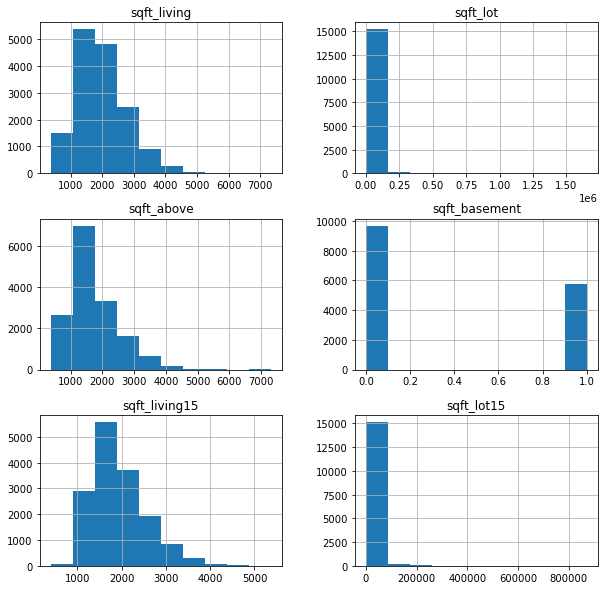

In [23]:
kc_house_quant.hist(figsize=(10,10))

For the most part, the data seems normal with minimal outliers.

In [24]:
# To check for NAs

x_train.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [25]:
x_train[x_train['waterfront'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18036,7701961220,6/26/2014,4,2.50,2990,16809,2.0,NaN,0.0,3,11,2990,0.0,1990,0.0,98077,47.7123,-122.073,3340,18752
12624,8854100220,12/5/2014,3,3.25,3050,12700,2.0,NaN,0.0,3,8,2240,1.0,1990,0.0,98011,47.7445,-122.214,3050,12386
16455,1568100380,10/16/2014,2,1.00,1160,8504,1.0,NaN,0.0,4,7,1160,0.0,1949,0.0,98155,47.7364,-122.295,1320,8504
13759,2113200065,10/27/2014,2,1.00,1010,7740,1.0,NaN,0.0,3,6,890,1.0,1924,0.0,98106,47.5323,-122.355,1030,6000
10393,1814800060,2/20/2015,4,3.50,3290,5559,1.5,NaN,0.0,3,8,2290,1.0,1906,2004.0,98103,47.6788,-122.346,1790,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,1829300260,11/13/2014,4,2.50,3360,13636,2.0,NaN,0.0,3,10,3360,0.0,1987,0.0,98074,47.6373,-122.042,2980,10615
9203,4468400211,2/20/2015,3,2.25,1250,952,3.0,NaN,0.0,3,8,1250,0.0,2008,0.0,98133,47.7098,-122.333,1250,1030
11112,3211270160,6/12/2014,4,2.50,2470,35073,2.0,NaN,0.0,3,9,2470,0.0,1989,0.0,98092,47.3064,-122.108,2990,35259
15086,7504180170,7/7/2014,3,2.25,1450,19206,2.0,NaN,0.0,3,7,1450,0.0,1989,0.0,98074,47.6200,-122.052,1710,21485


In [26]:
# Imputing waterfront with the most frequent value, which is 0.

waterfront = x_train[['waterfront']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(waterfront)

waterfront_imputed_train = imputer.transform(waterfront)

waterfront_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [27]:
x_train['waterfront'] = waterfront_imputed_train

In [28]:
# Imputing view with the most frequent value, which is 0.

view = x_train[['view']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(view)

view_imputed_train = imputer.transform(view)

view_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [29]:
x_train['view'] = view_imputed_train

In [30]:
x_train[x_train['yr_renovated'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4315,565300110,12/16/2014,3,2.50,2390,6435,1.0,0.0,0.0,3,8,1600,1.0,1978,NaN,98034,47.7260,-122.194,2020,7300
6087,8857640170,5/6/2015,4,2.50,2830,6536,2.0,0.0,0.0,3,8,2830,0.0,2003,NaN,98038,47.3888,-122.032,2830,6872
7053,8944360170,11/14/2014,3,2.50,1810,4332,2.0,0.0,0.0,3,8,1810,0.0,1992,NaN,98029,47.5776,-121.996,1740,4332
4675,9839301055,6/26/2014,3,1.50,1490,4400,1.5,0.0,0.0,4,7,1490,0.0,1906,NaN,98122,47.6113,-122.292,1560,4400
13864,7504400120,9/19/2014,4,1.75,2570,12039,1.0,0.0,0.0,3,8,1910,1.0,1978,NaN,98074,47.6260,-122.048,2200,12384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,7853270940,9/5/2014,3,2.50,1720,4515,2.0,0.0,0.0,3,7,1720,0.0,2005,NaN,98065,47.5426,-121.879,2220,4618
5554,3630120380,2/5/2015,2,2.00,1670,3507,1.0,0.0,0.0,3,9,1670,0.0,2007,NaN,98029,47.5545,-122.003,2330,3889
17652,2902200076,1/28/2015,3,3.00,2060,3200,2.0,0.0,0.0,3,8,2060,0.0,1907,NaN,98102,47.6370,-122.324,1760,2669
5636,7875400050,8/27/2014,3,1.50,1060,9225,1.0,0.0,0.0,4,7,1060,0.0,1955,NaN,98003,47.3217,-122.318,1270,9375


In [31]:
# Imputing year renovated with the most frequent value, which is 0.

renovated = x_train[['yr_renovated']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(renovated)

renovated_imputed_train = imputer.transform(renovated)

renovated_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [32]:
x_train['yr_renovated'] = renovated_imputed_train

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15430 entries, 4315 to 16543
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15430 non-null  int64  
 1   date           15430 non-null  object 
 2   bedrooms       15430 non-null  int64  
 3   bathrooms      15430 non-null  float64
 4   sqft_living    15430 non-null  int64  
 5   sqft_lot       15430 non-null  int64  
 6   floors         15430 non-null  float64
 7   waterfront     15430 non-null  float64
 8   view           15430 non-null  float64
 9   condition      15430 non-null  int64  
 10  grade          15430 non-null  int64  
 11  sqft_above     15430 non-null  int64  
 12  sqft_basement  15430 non-null  float64
 13  yr_built       15430 non-null  int64  
 14  yr_renovated   15430 non-null  float64
 15  zipcode        15430 non-null  int64  
 16  lat            15430 non-null  float64
 17  long           15430 non-null  float64
 18  sqf

In [34]:
# Imputing sqft basement with the mean value.

basement = x_train[['sqft_basement']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

imputer.fit(basement)

basement_imputed_train = imputer.transform(basement)

basement_imputed_train

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [35]:
x_train['sqft_basement'] = basement_imputed_train

In [36]:
x_train.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [37]:
# Making year renovated binary

mask = x_train.yr_renovated > 0
column_name = 'yr_renovated'
x_train.loc[mask, column_name] = 1

In [38]:
x_train['yr_renovated'].value_counts()

0.0    14955
1.0      475
Name: yr_renovated, dtype: int64

I now perform all of the same changes to my test data below:

In [39]:
x_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9285,1257201095,3/23/2015,2,1.00,1060,6120,1.0,0.0,0.0,3,7,1060,0.0,1908,0.0,98103,47.6739,-122.329,1730,4080
4275,2644900110,10/21/2014,3,1.75,1530,10300,1.0,NaN,0.0,4,7,1530,0.0,1978,0.0,98133,47.7767,-122.356,1940,9883
15812,3277801448,3/12/2015,3,2.00,1020,889,2.0,0.0,0.0,3,7,720,1.0,2009,0.0,98126,47.5434,-122.375,1130,972
11642,9842300036,10/8/2014,3,1.00,1310,4163,1.0,0.0,0.0,4,7,1310,0.0,1964,0.0,98126,47.5301,-122.381,1120,4166
13787,2871000360,11/24/2014,4,2.50,3060,6826,2.0,0.0,0.0,3,9,3060,0.0,2004,NaN,98052,47.7006,-122.112,3110,6932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,3845100620,11/25/2014,4,2.50,2578,4554,2.0,0.0,0.0,3,9,2578,0.0,2014,0.0,98092,47.2603,-122.194,2647,4554
11509,3389900800,10/22/2014,2,1.75,1400,2500,1.0,0.0,0.0,5,7,710,1.0,1916,0.0,98116,47.5628,-122.391,1250,5700
16540,1133000235,6/16/2014,6,2.25,3550,11780,1.0,0.0,0.0,4,8,2960,1.0,1948,0.0,98125,47.7218,-122.312,2360,8850
4047,1736100090,12/14/2014,3,1.00,1040,7490,1.0,0.0,0.0,3,7,1040,0.0,1969,0.0,98034,47.7137,-122.213,1520,7410


In [40]:
x_test.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [41]:
x_test[x_test['waterfront'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4275,2644900110,10/21/2014,3,1.75,1530,10300,1.0,NaN,0.0,4,7,1530,0.0,1978,0.0,98133,47.7767,-122.356,1940,9883
20386,1023059246,5/14/2014,3,2.75,2580,5200,2.0,NaN,0.0,3,8,2580,0.0,2008,NaN,98059,47.4960,-122.151,2700,5602
3501,9477000300,7/28/2014,4,2.25,2060,8540,1.0,NaN,0.0,4,7,1540,1.0,1967,0.0,98034,47.7340,-122.190,1560,7700
1596,2159900060,1/13/2015,2,1.50,1510,1962,2.0,NaN,0.0,4,8,1510,0.0,1985,0.0,98007,47.6214,-122.153,1510,2182
16448,3575302938,6/20/2014,3,1.00,1460,10000,1.5,NaN,0.0,3,7,1460,0.0,2002,0.0,98074,47.6214,-122.063,1910,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,3361401025,11/26/2014,2,1.00,1130,8160,1.0,NaN,0.0,4,6,1130,0.0,1952,0.0,98168,47.4997,-122.317,1060,6120
11584,7010700860,12/26/2014,4,1.50,1430,4163,1.5,NaN,0.0,3,7,1430,0.0,1910,0.0,98199,47.6606,-122.397,1500,4000
20443,2325300093,7/7/2014,3,2.50,1601,2491,3.0,NaN,0.0,3,7,1536,1.0,2007,NaN,98125,47.7190,-122.317,1420,1156
16563,7972601100,9/23/2014,3,1.75,1960,7705,1.0,NaN,0.0,4,7,980,1.0,1950,0.0,98106,47.5300,-122.347,1380,4349


In [42]:
waterfront2 = x_test[['waterfront']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(waterfront2)

waterfront2_imputed_train = imputer.transform(waterfront2)

waterfront2_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [43]:
x_test['waterfront'] = waterfront2_imputed_train

In [44]:
x_test[x_test['view'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11305,1560100135,2/24/2015,2,1.00,890,7250,1.0,0.0,NaN,3,7,890,0.0,1943,0.0,98125,47.7118,-122.314,900,7000
14003,6303400150,9/29/2014,3,1.00,1160,8636,1.0,0.0,NaN,3,6,1160,0.0,1923,0.0,98146,47.5097,-122.357,1300,8636
4740,4123810090,9/9/2014,3,2.25,2140,10256,2.0,0.0,NaN,3,8,2140,0.0,1987,NaN,98038,47.3751,-122.044,2040,11717
10023,3423600060,12/2/2014,4,1.75,2280,3680,1.5,0.0,NaN,5,7,1470,1.0,1926,0.0,98115,47.6754,-122.300,1850,3680
487,1895000260,7/21/2014,2,2.00,890,5000,1.0,0.0,NaN,3,6,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
13456,871001085,1/29/2015,3,1.00,1470,6122,1.0,0.0,NaN,3,8,1200,1.0,1948,NaN,98199,47.6517,-122.406,2200,6122
17222,316000190,2/15/2015,4,1.00,1370,5339,1.5,0.0,NaN,4,6,1370,0.0,1948,0.0,98168,47.5046,-122.300,1280,7048
7,2008000270,1/15/2015,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
7686,3579700100,5/27/2014,5,2.00,2330,10750,1.0,0.0,NaN,4,7,1190,1.0,1962,0.0,98028,47.7325,-122.245,1830,10180
9853,2719100400,9/12/2014,3,1.75,1340,6250,1.0,0.0,NaN,4,7,1090,1.0,1941,0.0,98136,47.5427,-122.386,1550,1755


In [45]:
view2 = x_test[['view']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(view2)

view2_imputed_train = imputer.transform(view2)

view2_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [46]:
x_test['view'] = view2_imputed_train

In [47]:
x_test[x_test['yr_renovated'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13787,2871000360,11/24/2014,4,2.50,3060,6826,2.0,0.0,0.0,3,9,3060,0.0,2004,NaN,98052,47.7006,-122.112,3110,6932
20386,1023059246,5/14/2014,3,2.75,2580,5200,2.0,0.0,0.0,3,8,2580,0.0,2008,NaN,98059,47.4960,-122.151,2700,5602
17105,4305700086,4/10/2015,2,1.00,1330,3698,1.0,0.0,0.0,3,7,1330,0.0,1952,NaN,98117,47.6866,-122.372,1900,5000
18893,1951100100,11/13/2014,3,1.00,940,11055,1.5,0.0,0.0,4,7,940,0.0,1959,NaN,98032,47.3732,-122.295,1420,9100
19248,7899800586,4/9/2015,4,1.00,2300,7680,1.0,0.0,0.0,3,7,1270,1.0,1959,NaN,98106,47.5240,-122.359,1840,5120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,7789900030,7/25/2014,4,1.50,1890,10707,1.0,0.0,0.0,3,7,1890,0.0,1962,NaN,98148,47.4280,-122.326,1610,8827
20443,2325300093,7/7/2014,3,2.50,1601,2491,3.0,0.0,0.0,3,7,1536,1.0,2007,NaN,98125,47.7190,-122.317,1420,1156
15590,1769600066,12/11/2014,3,3.50,3030,11550,2.0,0.0,2.0,3,8,3030,0.0,1971,NaN,98146,47.5051,-122.381,2340,10560
9436,3523029077,10/7/2014,3,1.00,1340,18000,1.0,0.0,0.0,4,7,1340,0.0,1924,NaN,98070,47.4443,-122.509,1660,196591


In [48]:
renovated2 = x_test[['yr_renovated']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(renovated2)

renovated2_imputed_train = imputer.transform(renovated2)

renovated2_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [49]:
x_test['yr_renovated'] = renovated2_imputed_train

In [50]:
x_test.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [51]:
basement2 = x_test[['sqft_basement']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

imputer.fit(basement2)

basement2_imputed_train = imputer.transform(basement2)

basement2_imputed_train

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [52]:
x_test['sqft_basement'] = basement2_imputed_train

In [53]:
mask = x_test.yr_renovated > 0
column_name = 'yr_renovated'
x_test.loc[mask, column_name] = 1

In [54]:
x_test['yr_renovated'].value_counts()

0.0    4983
1.0     161
Name: yr_renovated, dtype: int64

In [55]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15430 entries, 4315 to 16543
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15430 non-null  int64  
 1   date           15430 non-null  object 
 2   bedrooms       15430 non-null  int64  
 3   bathrooms      15430 non-null  float64
 4   sqft_living    15430 non-null  int64  
 5   sqft_lot       15430 non-null  int64  
 6   floors         15430 non-null  float64
 7   waterfront     15430 non-null  float64
 8   view           15430 non-null  float64
 9   condition      15430 non-null  int64  
 10  grade          15430 non-null  int64  
 11  sqft_above     15430 non-null  int64  
 12  sqft_basement  15430 non-null  float64
 13  yr_built       15430 non-null  int64  
 14  yr_renovated   15430 non-null  float64
 15  zipcode        15430 non-null  int64  
 16  lat            15430 non-null  float64
 17  long           15430 non-null  float64
 18  sqf

In [56]:
# Drop unnecessary columns for modeling

x_train = x_train.drop(['id','date','view','yr_built','zipcode','lat','long'], axis = 1)
x_test = x_test.drop(['id','date', 'view','yr_built','zipcode','lat','long'], axis = 1)

In [57]:
# Check test model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.53130200982956

Now that we have reviewed our data, we can begin to model.

# Section 4: Modeling

I will begin by creating a heat matrix to determine the most correlated variables.

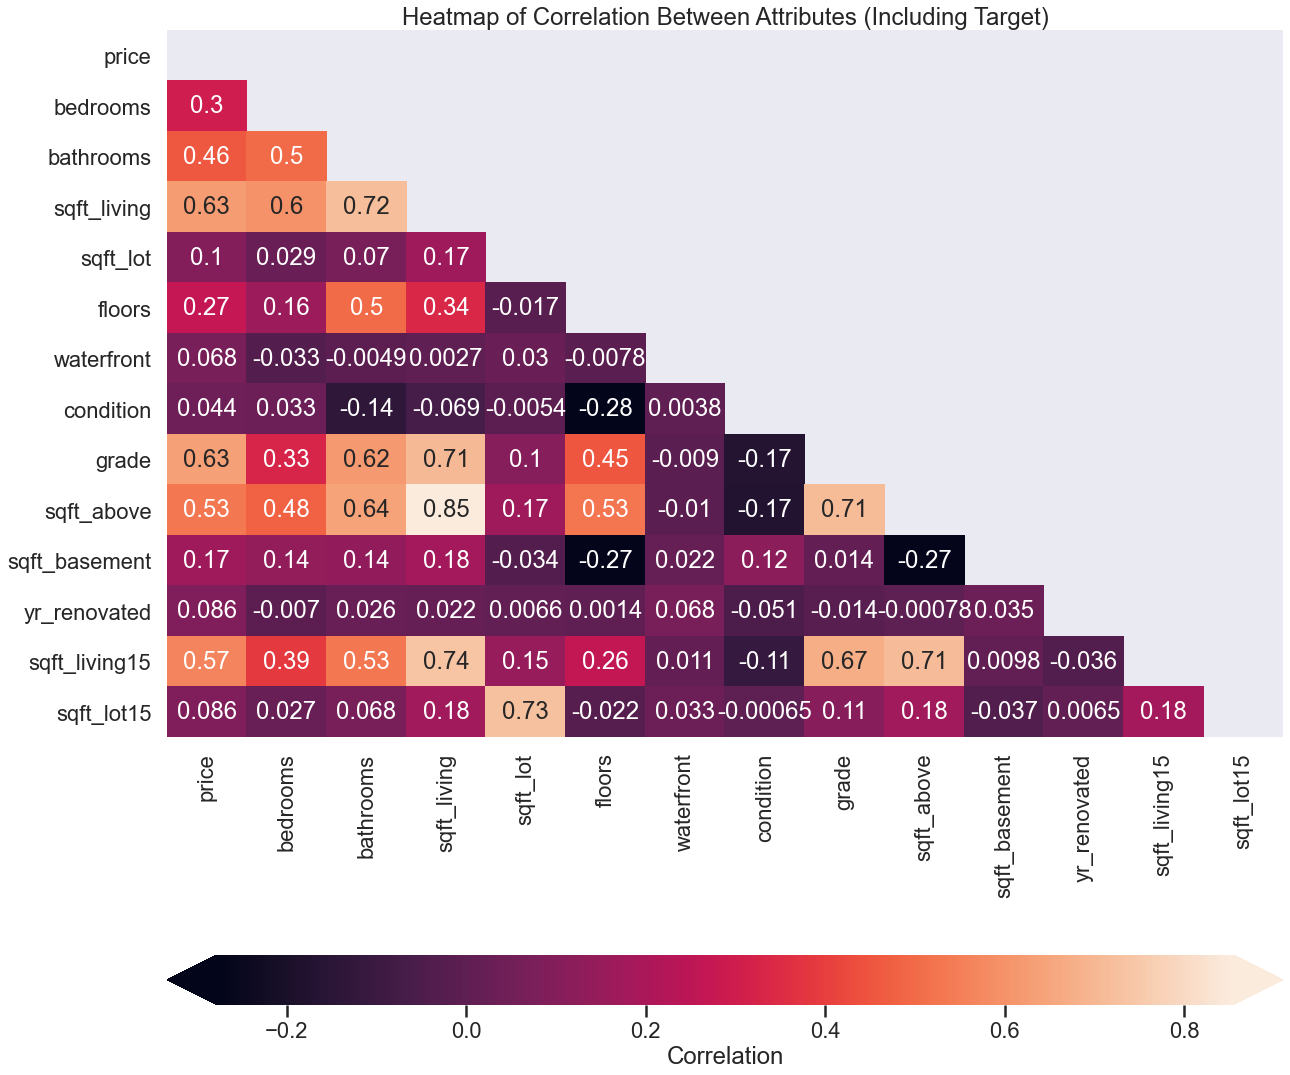

In [58]:
x_kc = kc_house.drop("price", axis=1)
y_kc = kc_house["price"]

import seaborn as sns
import numpy as np

sns.set_context('poster')
sns.set_style("darkgrid")
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, x_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)


# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");
fig.set_facecolor('white')
plt.savefig('Visualizations/heatmap.png', bbox_inches = 'tight')


Based on the correlation matrix above, it seems that sqft_living and grade are the most correlated with price. As the other sqft variables are correlated amongst themselves, I will exclude the rest and focus on grade and sqft_living. I will make two baseline models based on these two variables

In [59]:
most_correlated = 'grade'
second_most_correlated = 'sqft_living'

Now that we have our baseline models, we can deal with multicollinearity of features between our categories.

In [60]:
# Generate a list of variables that are highly correlated

df=x_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [61]:
# Show the variables with correlations above .7

df[(df.cc>.70) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.853534
"(sqft_living, sqft_living15)",0.737993
"(sqft_lot15, sqft_lot)",0.726631
"(bathrooms, sqft_living)",0.718127
"(sqft_above, sqft_living15)",0.714584
"(grade, sqft_above)",0.708215
"(sqft_living, grade)",0.705210


As we can see above, a lot of the sqft columns have high correlation with each other. Because of this, I will remove all of them except for sqft_living.

In [62]:
x_train = x_train.drop(['sqft_above','sqft_living15','sqft_lot','sqft_lot15'], axis = 1)

Now that multicollinearity has been dealt with, let's take a deeper look into our two variables that are most important.

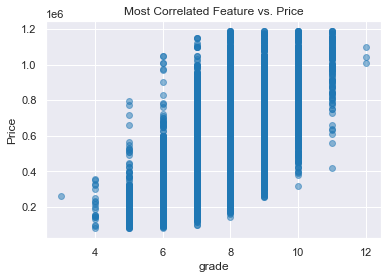

In [63]:
# Plotting Grade against price
sns.set_context('notebook')
fig, ax = plt.subplots()
ax.scatter(x_train[most_correlated], y_train, alpha=0.5)
ax.set_xlabel(most_correlated)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

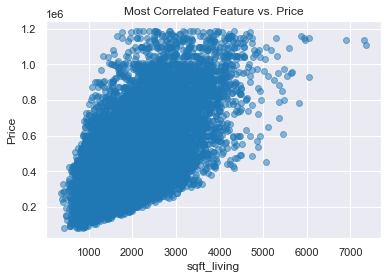

In [64]:
# Plotting sqft_living against price

fig, ax = plt.subplots()

ax.scatter(x_train[second_most_correlated], y_train, alpha=0.5)
ax.set_xlabel(second_most_correlated)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

### Baseline Model

Before we begin to model, I will build a baseline model with our most correlated variables to see where we are at before any revisions

In [65]:
# Import linear.model and assign models to variables

from sklearn.linear_model import LinearRegression
baseline_model1 = LinearRegression()
baseline_model2 = LinearRegression()

In [66]:
# Run baseline model for most correlated variable

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model1,
    X = x_train[[most_correlated]],
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Grade Train score:     ", baseline_scores["train_score"].mean())
print("Grade Validation score:", baseline_scores["test_score"].mean())

Grade Train score:      0.40341559146641465
Grade Validation score: 0.40041689573099615


In [67]:
# Run baseline model for second most correlated variable

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores2 = cross_validate(
    estimator=baseline_model2,
    X = x_train[[second_most_correlated]],
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Living Sqft Train score:     ", baseline_scores["train_score"].mean())
print("Living Sqft Validation score:", baseline_scores["test_score"].mean())

Living Sqft Train score:      0.40341559146641465
Living Sqft Validation score: 0.40041689573099615


Now that we have our baseline models and an understanding of the data, let's begin to refine the models to try to get a better r^2.

### Model 2.0

The purpose of this model is to try to identify attributes that can help raise the value of a home. A waterfront view cannot be changed, and adding floors to a home can be costly. Bathrooms seems to be slightly correlated with bedrooms, so I will remove this as well. 

In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15430 entries, 4315 to 16543
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15430 non-null  int64  
 1   bathrooms      15430 non-null  float64
 2   sqft_living    15430 non-null  int64  
 3   floors         15430 non-null  float64
 4   waterfront     15430 non-null  float64
 5   condition      15430 non-null  int64  
 6   grade          15430 non-null  int64  
 7   sqft_basement  15430 non-null  float64
 8   yr_renovated   15430 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.2 MB


In [69]:
# Drop variables based on opinion

x_train_numeric = x_train.drop(['sqft_basement','yr_renovated','floors','waterfront','bathrooms'], axis=1)

In [70]:
x_train_numeric

,bedrooms,sqft_living,condition,grade
4315,3,2390,3,8
18036,4,2990,3,11
20988,3,1800,3,8
7159,3,1290,3,7
2844,5,4300,3,8
...,...,...,...,...
11806,4,1680,3,7
12522,2,1170,3,9
5636,3,1060,4,7
901,4,3810,3,9


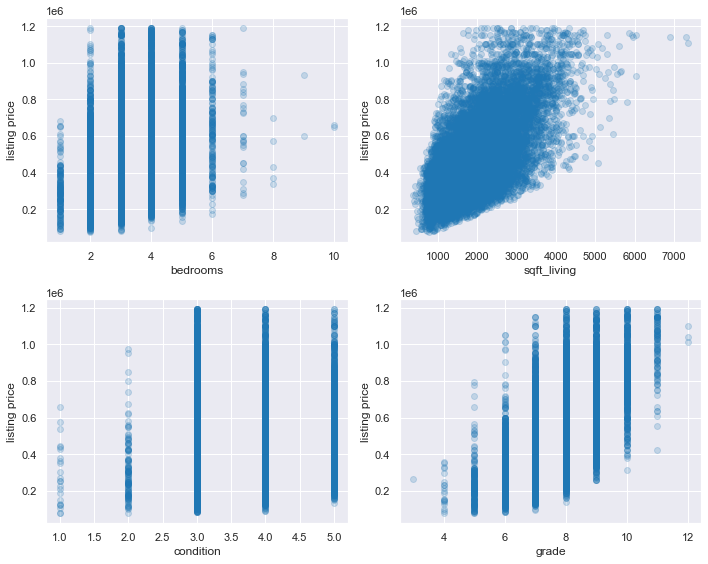

In [71]:
# Plot data to for context

scatterplot_data = x_train_numeric

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//2][index%2]
    ax.scatter(x_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

I will create my second model based on these variables.

In [72]:
x_train_second_model = x_train_numeric.copy()

x_train_second_model

,bedrooms,sqft_living,condition,grade
4315,3,2390,3,8
18036,4,2990,3,11
20988,3,1800,3,8
7159,3,1290,3,7
2844,5,4300,3,8
...,...,...,...,...
11806,4,1680,3,7
12522,2,1170,3,9
5636,3,1060,4,7
901,4,3810,3,9


In [73]:
# Create model based on variables above

second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=x_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.48859878861712325
Validation score: 0.4855419305408956

Baseline Model
Train score:      0.40341559146641465
Validation score: 0.40041689573099615


This model performed much better than our original model, but let's see if we can do better.

In [74]:
# Check statsmodels

import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(x_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     3674.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:09:00   Log-Likelihood:            -2.0612e+05
No. Observations:               15430   AIC:                         4.122e+05
Df Residuals:                   15425   BIC:                         4.123e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.572e+05   1.39e+04    -32.968      0.000   -4.84e+05    -4.3e+05
bedrooms    -1.881e+04   1768.335    -10.637      0.000   -2.23e+04   -1.53e+04
sqft_living   108.5508      2.658     40.832      0.000     103.340     113.762
condition    4.699e+04   1942.861     24.188      0.000    4.32e+04    5.08e+04
grade        8.299e+04   1710.961     48.505      0.000    7.96e+04    8.63e+04
==============================================================================
Omnibus:                     1110.061   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.067
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       3.806   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### All Possible Models

In [75]:
# Here I will run multiple for loops iterating over 7 variables to run models and try to find the strongest one.

from itertools import combinations

features = ["sqft_living", "floors", "condition", "sqft_basement","grade", "yr_renovated","waterfront"]

# Make a dataframe to hold the results
results_df = pd.DataFrame(columns=features)

# Selecting just living_sqft
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
 # Selecting 3 additional features
for (feature1, feature2, feature3) in list(combinations(features[1:], 3)):
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature1, feature2, feature3]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)   
    
 # Selecting 4 additional features
for (feature1, feature2, feature3, feature4) in list(combinations(features[1:], 4)):
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True) 
    
 # Selecting 5 additional features
for (feature1, feature2, feature3, feature4,feature5) in list(combinations(features[1:], 5)):
    scores = cross_validate(
        estimator=second_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4,feature5]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True) 
    
# Including all 6 additional features
results_df = results_df.append({
    "floors": "Yes", "condition": "Yes", "sqft_basement": "Yes", "grade": "Yes", "yr_renovated": "Yes", "waterfront": "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df

,sqft_living,floors,condition,sqft_basement,grade,yr_renovated,waterfront,train_score,val_score
0,Yes,No,No,No,No,No,No,0.403416,0.400417
1,Yes,Yes,No,No,No,No,No,0.394756,0.395150
2,Yes,No,Yes,No,No,No,No,0.399244,0.397961
3,Yes,No,No,Yes,No,No,No,0.394367,0.395197
4,Yes,No,No,No,Yes,No,No,0.465816,0.465483
...,...,...,...,...,...,...,...,...,...
59,Yes,Yes,Yes,Yes,No,Yes,Yes,0.423057,0.418373
60,Yes,Yes,Yes,No,Yes,Yes,Yes,0.498263,0.491257
61,Yes,Yes,No,Yes,Yes,Yes,Yes,0.487495,0.484723
62,Yes,No,Yes,Yes,Yes,Yes,Yes,0.505166,0.498607


In [76]:
# Use the max function to find the best model. Including all 7 variables generates the best model.

results_df.max()

sqft_living           Yes
floors                Yes
condition             Yes
sqft_basement         Yes
grade                 Yes
yr_renovated          Yes
waterfront            Yes
train_score      0.505166
val_score        0.498607
dtype: object

This matrix shows that our second model with all of our inputs is the best model that we can make.

In [77]:
# Assign best features to a variable

best_features = ['sqft_living','bedrooms','condition','sqft_basement','grade','yr_renovated','waterfront']

In [78]:
# Generate tables with the best features

x_train_final = x_train[best_features]
x_test_final = x_test[best_features]

In [79]:
# Get our final r^2 statistic

final_model = LinearRegression()

final_model.fit(x_train_final,y_train)
final_model.score(x_test_final,y_test)

0.516615892805042

# Section 5: Regression Results

In [80]:
# Check statsmodels

import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(x_train_final)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2264.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:09:02   Log-Likelihood:            -2.0582e+05
No. Observations:               15430   AIC:                         4.117e+05
Df Residuals:                   15422   BIC:                         4.117e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.923e+05   1.37e+04    -35.954      0.000   -5.19e+05   -4.66e+05
sqft_living      97.6065      2.665     36.626      0.000      92.383     102.830
bedrooms      -1.733e+04   1738.091     -9.972      0.000   -2.07e+04   -1.39e+04
condition      4.517e+04   1922.902     23.490      0.000    4.14e+04    4.89e+04
sqft_basement  3.871e+04   2599.219     14.892      0.000    3.36e+04    4.38e+04
grade          8.828e+04   1698.323     51.978      0.000    8.49e+04    9.16e+04
yr_renovated    1.03e+05   7047.465     14.610      0.000    8.91e+04    1.17e+05
waterfront     2.423e+05   2.28e+04     10.637      0.000    1.98e+05    2.87e+05
==============================================================================
Omnibus:                      972.988   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1274.717
Skew:                           0.585   Prob(JB):                    1.58e-277
Kurtosis:                       3.783   Cond. No.                     4.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# Generate mean absolute error to show how far off our model could potentially be.

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, final_model.predict(x_test_final))

118091.65109848675

In [82]:
# Based on the mean price, our model could be off by an average $118k

y_train.mean()

481299.8694750486

In [83]:
# Generate coefficients for each feature. 

print(pd.Series(final_model.coef_, index=x_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living          97.606532
bedrooms         -17332.841463
condition         45169.440498
sqft_basement     38708.034543
grade             88275.239195
yr_renovated     102962.463360
waterfront       242267.562235
Name: Coefficients, dtype: float64

Intercept: -492342.3958871926


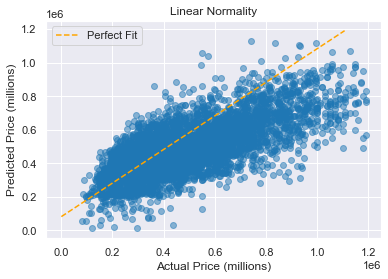

In [84]:
# Generate perfect line for linearity

preds = final_model.predict(x_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
fig.set_facecolor('white')
ax.set_title("Linear Normality")
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price (millions)")
ax.set_ylabel("Predicted Price (millions)")
ax.legend();

plt.savefig('Visualizations/Linearity.png', bbox_inches = 'tight')

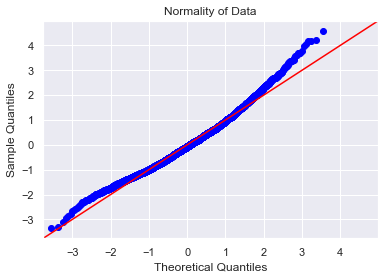

In [85]:
# Check for normality based on Q-Q plot

import scipy.stats as stats
residuals = (y_test - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
fig.set_facecolor('white')
plt.title('Normality of Data')
plt.savefig('Visualizations/Normality.png', bbox_inches = 'tight')

In [86]:
# Check our variance inflation factor for each variable

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train_final.values, i) for i in range(x_train_final.shape[1])]
pd.Series(vif, index=x_train_final.columns, name="Variance Inflation Factor")

sqft_living      16.817056
bedrooms         21.899116
condition        20.350368
sqft_basement     1.709022
grade            38.245766
yr_renovated      1.037315
waterfront        1.009581
Name: Variance Inflation Factor, dtype: float64

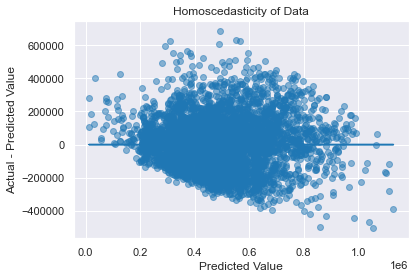

In [87]:
# Check for homoscedasticity

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(x_test))])
fig.set_facecolor('white')
ax.set_title('Homoscedasticity of Data')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
plt.savefig('Visualizations/Homoscedasticity.png', bbox_inches = 'tight')

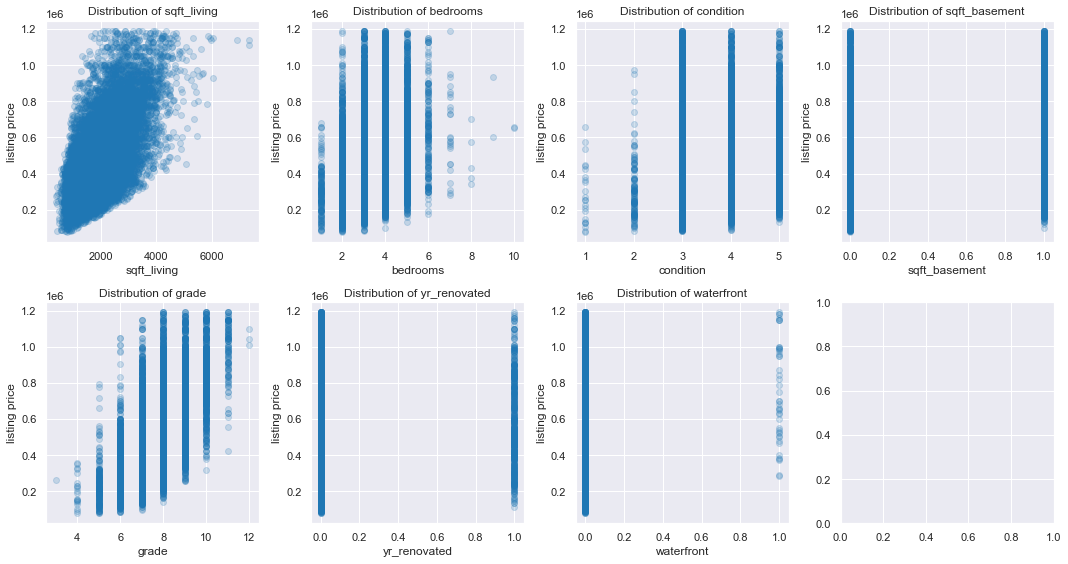

In [88]:
# Plot final features for context

scatterplot_data = x_train_final

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(15, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(x_train_final[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")
    ax.set_title("Distribution of " + col)
    fig.set_facecolor('white')
plt.savefig('Visualizations/features.png', bbox_inches = 'tight')